In [ ]:
# Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.8.0


In [91]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

| 

In [3]:
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [66]:
# Step 1: Understanding Dataset

In [4]:
# Import dataset and check it out
df = pd.read_csv('forestfires.csv')
print(df.head(10))

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0


In [5]:
# null values, do we have any?

df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
# Step 2: Data Preprocessing

In [7]:
# 1) Add size_category column
# For classification problem, we attempt to add a new column, namely size_category to categorize the data into two categories:
#
#     If the value of the area < 6 then the size_category will be labeled as 0 (Small Fire)
#     If the value of the area ≥ 6 then the size_category will be labeled as 1 (Wide Fire)

In [8]:
#df['size_category'] = np.where(df['area']>6, '1', '0')
#df['size_category']= pd.to_numeric(df['size_category'])
#print(df.tail(10))

In [9]:
# 2) Data Preprocessing for Days

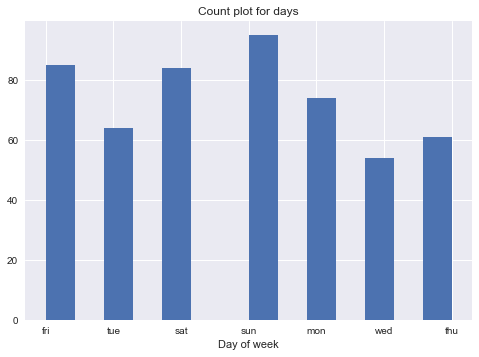

In [10]:
plt.hist(df['day'], bins=14)
plt.xlabel('Day of week')
plt.title('Count plot for days')
plt.show()

In [11]:
# Instead of encoding 7 variables, separate these into weekend ( True ) or not weekend ( False). During the weekend,
# the amount of firefighters or the response in general may be different compared to during the weekday.

/Users/jacobchambers/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

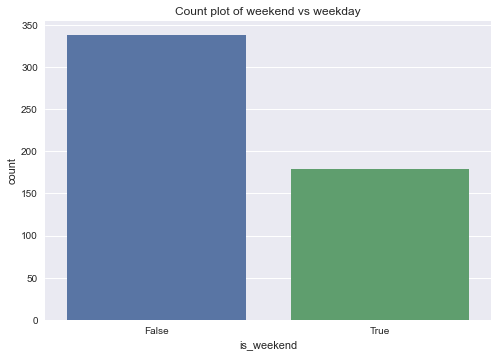

In [12]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))
# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})
# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

/Users/jacobchambers/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of months')

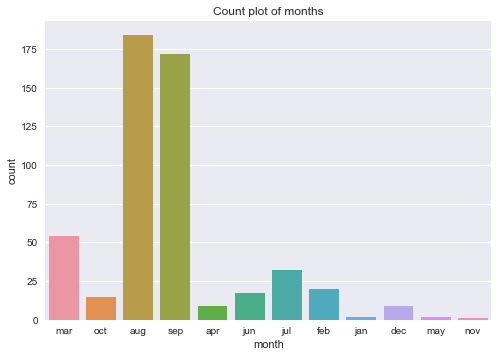

In [13]:
# visualizing months
sns.countplot(df['month'])
plt.title('Count plot of months')

/Users/jacobchambers/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of seasons')

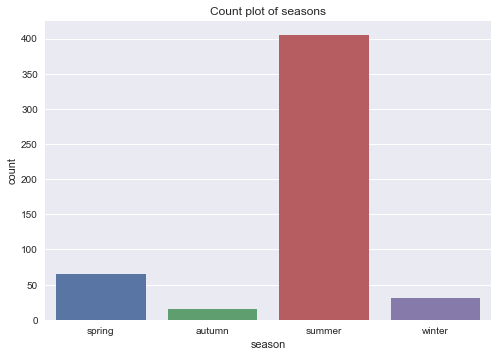

In [14]:
# dictionary of months mapping to seasons
season_dict = {'dec' : 'winter', 'jan' : 'winter', 'feb' : 'winter',
              'mar' : 'spring', 'apr' : 'spring', 'may' : 'spring',
              'jun' : 'summer', 'jul' : 'summer', 'aug' : 'summer', 'sep' : 'summer',
              'oct' : 'autumn', 'nov' : 'autumn'}

# applying dictionary
df = df.replace({'month' : season_dict})

# renaming column
df = df.rename(columns = {'month' : 'season'})

# visualizing data
sns.countplot(df['season'])
plt.title('Count plot of seasons')

/Users/jacobchambers/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of summer vs other seasons')

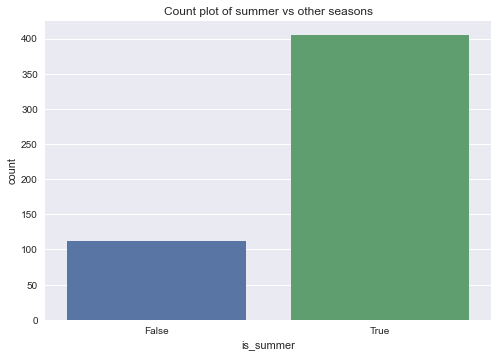

In [15]:
### converting season to summer or not summer ###

# converting to is summer
df['season'] = (df['season'] == 'summer')

# renaming column
df = df.rename(columns = {'season' : 'is_summer'})

# visualizing data
sns.countplot(df['is_summer'])
plt.title('Count plot of summer vs other seasons')

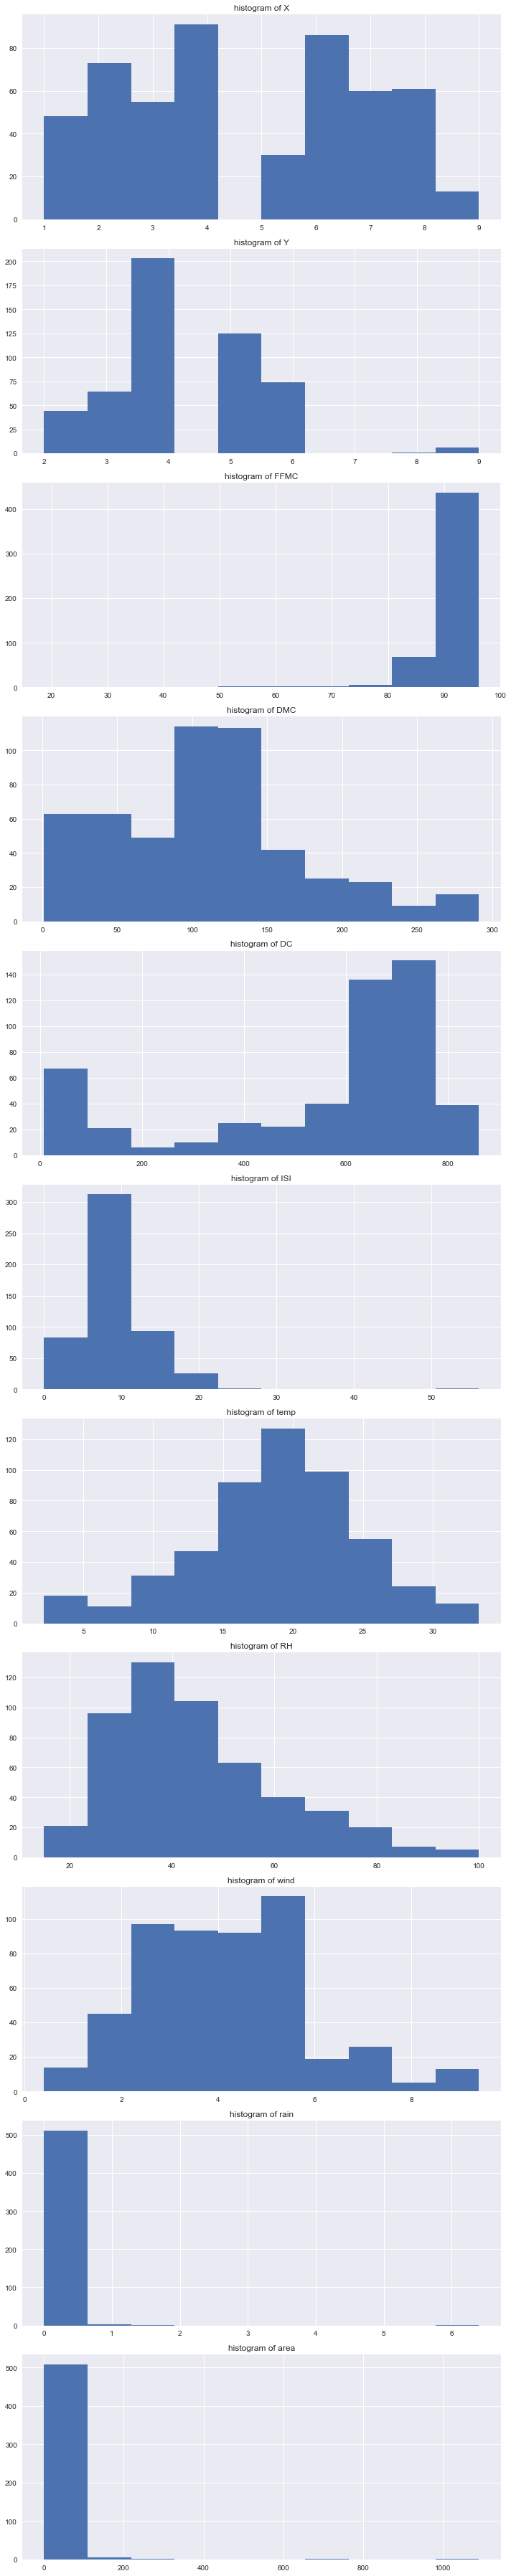

In [16]:
### visualizing distributions ###

# subplots
fig, ax = plt.subplots(11, figsize = (10,50))

# initial index
index = 0
unused_column = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# visualizing
for column in unused_column:
    if column != 'is_summer':
        ax[index].hist(df[column])
        ax[index].title.set_text('histogram of ' + column)
        index += 1

# making plots visible
plt.tight_layout()

In [17]:
# 3) Scaling Area and Rain
df.head()

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,False,False,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,False,False,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,False,True,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,False,False,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,False,True,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Text(0.5, 1.0, 'Histogram of area')

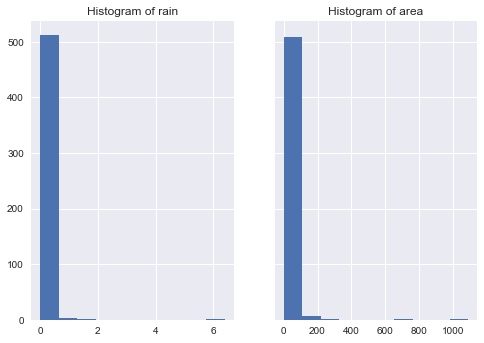

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(df['rain'], bins=10)
ax1.set_title('Histogram of rain')
ax2.hist(df['area'], bins=10)
ax2.set_title('Histogram of area')

In [19]:
# The distributions of rain and area are too skewed and have large outliers so we will scale it to even out the distribution.

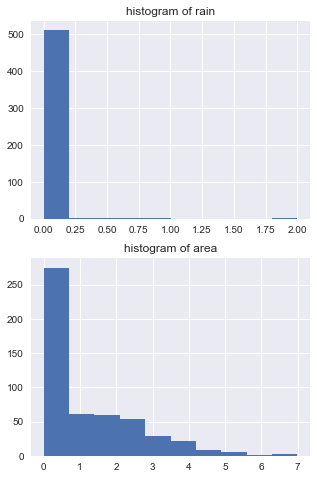

In [20]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

In [21]:
# Now we scale the entire dataset. Note that we plan on testing a neural network on the dataset so we will scale the area as a preventative measure against an exploding gradient.

# First we will split the data into train and test splits so that we can scale the train set and then scale the test set based on the train set. Then we will scale everything.

In [22]:
# 4) Train Test Split

In [23]:
# separating features from target
# normally we use X and y but since X and Y are variables, we use the names features and targets to prevent potential conflicts
features = df.drop(['area'], axis = 1)
target = df['area'].values.reshape(-1, 1)

# splitting into train test set
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = 0.5, random_state = 42)

In [24]:
# 5) Feature Scaling: StandardScaler

In [25]:
### scaling data ###

# fitting scaler
sc_feature = StandardScaler()
sc_target = StandardScaler()

# transforming features
features_test = sc_feature.fit_transform(features_test)
features_train = sc_feature.transform(features_train)

# transforming target
target_test = sc_target.fit_transform(target_test)
target_train = sc_target.transform(target_train)

In [26]:
### converting everything to dataframe for csv storage ###

# features
features_test = pd.DataFrame(features_test, columns = features.columns)
features_train = pd.DataFrame(features_train, columns = features.columns)

# target
target_test = pd.DataFrame(target_test, columns = ['area'])
target_train = pd.DataFrame(target_train, columns = ['area'])

# checking to see if everything is in order
features_test.head()

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.598790,0.576522,-1.821172,1.418319,-1.139945,-1.305419,-1.748511,-1.149368,-1.234987,3.106552,0.400935,-0.119172
1,1.023686,0.576522,0.549097,-0.705060,1.072840,1.240626,0.527797,0.923229,0.433913,1.334447,0.400935,8.263105
2,1.448581,1.388040,0.549097,-0.705060,0.268190,1.671342,0.533514,-0.247405,1.065826,-0.865409,-1.357179,-0.119172
3,0.173895,-0.234995,0.549097,-0.705060,0.710747,-0.355849,0.613965,1.230280,0.190869,0.234519,0.400935,-0.119172
4,-1.100790,-0.234995,0.549097,-0.705060,0.750980,0.547157,0.600896,2.017099,1.665333,-0.804301,0.400935,-0.119172


In [27]:
### saving everything to csv ###

# features
features_test.to_csv('features_test.csv')
features_train.to_csv('features_train.csv')

# target
target_test.to_csv('target_test.csv')
target_train.to_csv('target_train.csv')